<a href="https://colab.research.google.com/github/edgarango/MIAD_NLP_2024/blob/main/S6TC1_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import GlorotNormal
from keras.models import clone_model
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import StandardScaler
from keras import backend as K

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


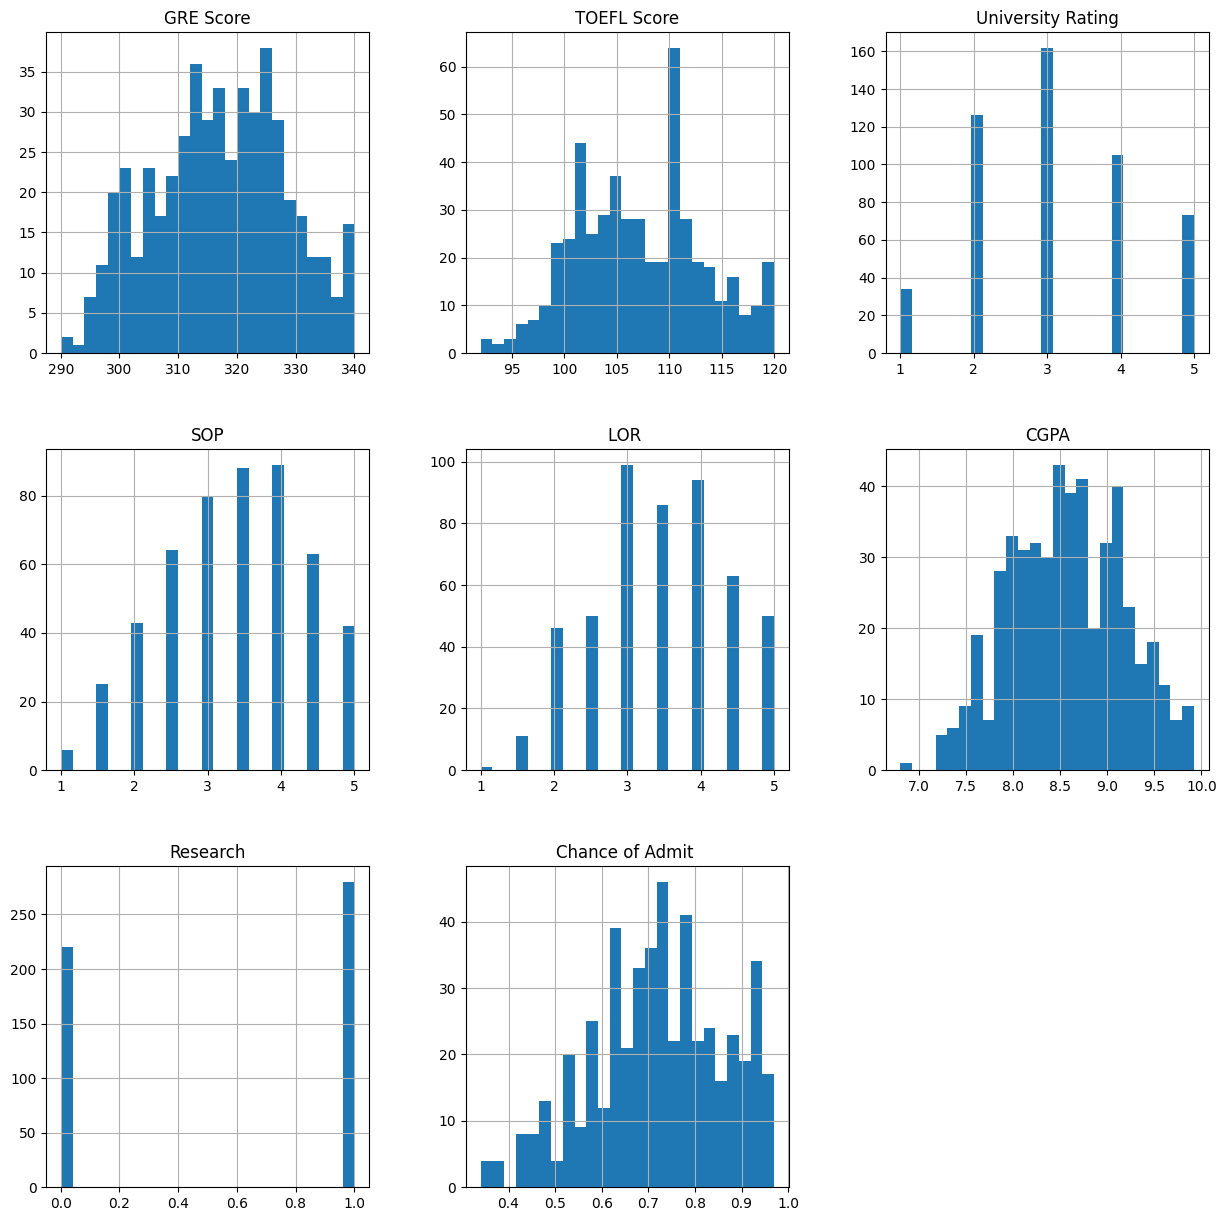

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 1
# La idea inicial es construir diferentes modelos en los cuales se modifique los parametros:
# FuncionDePerdida = {mean_squared_error, mean_absolute_error, mean_squared_logarithmic_error}
# Optimizador = {SGD, Adam, rmsprop}
# Num. Epocas = {20,50,100,200}

# Se define los parametros para modificar
FuncionDePerdida = ['mean_squared_error', 'mean_absolute_error', 'mean_squared_logarithmic_error']
Optimizador = ['SGD', 'adam', 'rmsprop']
N_Epoca = list(range(1,100,10))

mse_best = 100000

# Entrenamiento del modelo
for func in FuncionDePerdida:
  for opt in Optimizador:
    for epoc in N_Epoca:
      modelo = None
      modelo = keras.Sequential()
      # Se define la primera capa de entrada de valores igual a la cantidad de parametros y de una sola salida.
      # funcion de activacion sigmoide e inicializacion de pesos en cero
      modelo.add(Dense(1, activation='sigmoid',kernel_initializer='zeros',input_shape=(xTrain.shape[1],)))
      # se varia la funcion de perdida y el optimizador
      modelo.compile(loss=func,optimizer=opt)
      # Se entrena el modelo variando el numero de epocas
      modelo.fit(xTrain,yTrain,epochs=epoc,validation_data=(xTest, yTest),verbose=0)
      prediccion = modelo.predict(xTest,verbose=0)
      pred = prediccion.reshape(-1)
      mse = np.mean((yTest - pred) ** 2)
      ## Se almacena el modelo y parametros con mejor resultado
      if mse_best> mse:
        mse_best = mse
        modelo_f = clone_model(modelo)
        modelo_f.set_weights(modelo.get_weights())
        FP_best = func
        Opt_best = opt
      print("Modelo entrenado con la funcion de perdida:",func,", Optimizador:",opt,", # epocas:",epoc,", mse:",mse)

Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 1 , mse: 0.10493466666666668
Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 11 , mse: 0.10493466666666668
Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 21 , mse: 0.10493466666666668
Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 31 , mse: 0.10493466666666668
Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 41 , mse: 0.10493466666666668
Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 51 , mse: 0.10493466666666668
Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 61 , mse: 0.10493466666666668
Modelo entrenado con la funcion de perdida: mean_squared_error , Optimizador: SGD , # epocas: 71 , mse: 0.10493466666666668
Modelo en

KeyboardInterrupt: 

In [ ]:
# Prediccion con el mejor modelo
prediccion_f = modelo_f.predict(xTest,verbose=0)
pred_f = prediccion_f.reshape(-1)
mse_f = np.mean((yTest - pred_f) ** 2)
mae_f = np.mean(np.abs(yTest - pred_f))
print("El valor de la metrica MSE de el mejor modelo es:",mse_f)
print("El valor de la metrica MAE de el mejor modelo es:",mae_f)

Se realiza la construccion de nuevo del modelo con los parametros que mejor resultado dieron anteriormente:

In [ ]:
modelo_Y = None
modelo_Y = keras.Sequential()
modelo_Y.add(Dense(1, activation='sigmoid',kernel_initializer='zeros',input_shape=(xTrain.shape[1],)))
modelo_Y.compile(loss=FP_best,optimizer=Opt_best)
modelo_Y.fit(xTrain,yTrain,epochs=100,validation_data=(xTest, yTest),verbose=1,callbacks=[PlotLossesKeras()])

**Conclusión:**  
Inicialmente se entrenó el modelo con diferentes valores en sus parámetros que son sugeridos en el ejercicio (Funcion de perdida, Optimizador y número de épocas) con el fin de encontrar el mejor modelo posible.  
Otros parámetros que se definieron por defecto es la funcion de activacion que usará en cada neurona, el cual en este caso fue sigmoide (la razón principal de elegirlo fue que el rango de valores de esta función va entre 0 a 1 y es ideal para el tipo de salida que se espera obtener de este ejercicio, la cual es la probabilidad de pasar el examen). También se decidió inicializar los pesos en cero para todos los modelos, esto permite ver que al modificar los optimizadores se pudieran encontrar diferentes valores óptimos (pesos) cuando se aumenta el número de épocas.  
El mejor modelo obtenido en el ejercicio presentó un valor de _MSE_ de 0.0069 y un _MAE_ de 0.063.  
Finalmente, se obtienen los parámetros que producen el mejor modelo y se vuelve a crear un modelo con dichos parámetros (se hace con 100 épocas para ver como avanza el error de entrenamiento y validación en cada época). Se entiende que esta última gráfica se hace más en el ejercicio de observación que sucede con el error de predicción en entrenamiento y validación para identificar el sub-ajuste y el sobre-ajuste del modelo.


## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Escalar datos de entrada
scaler = StandardScaler()
xTrain_escalado = scaler.fit_transform(xTrain)
xTest_escalado = scaler.transform(xTest)

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain.shape[1]
print(dims, 'input variables')

# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, 'output variables')

7 input variables
1 output variables


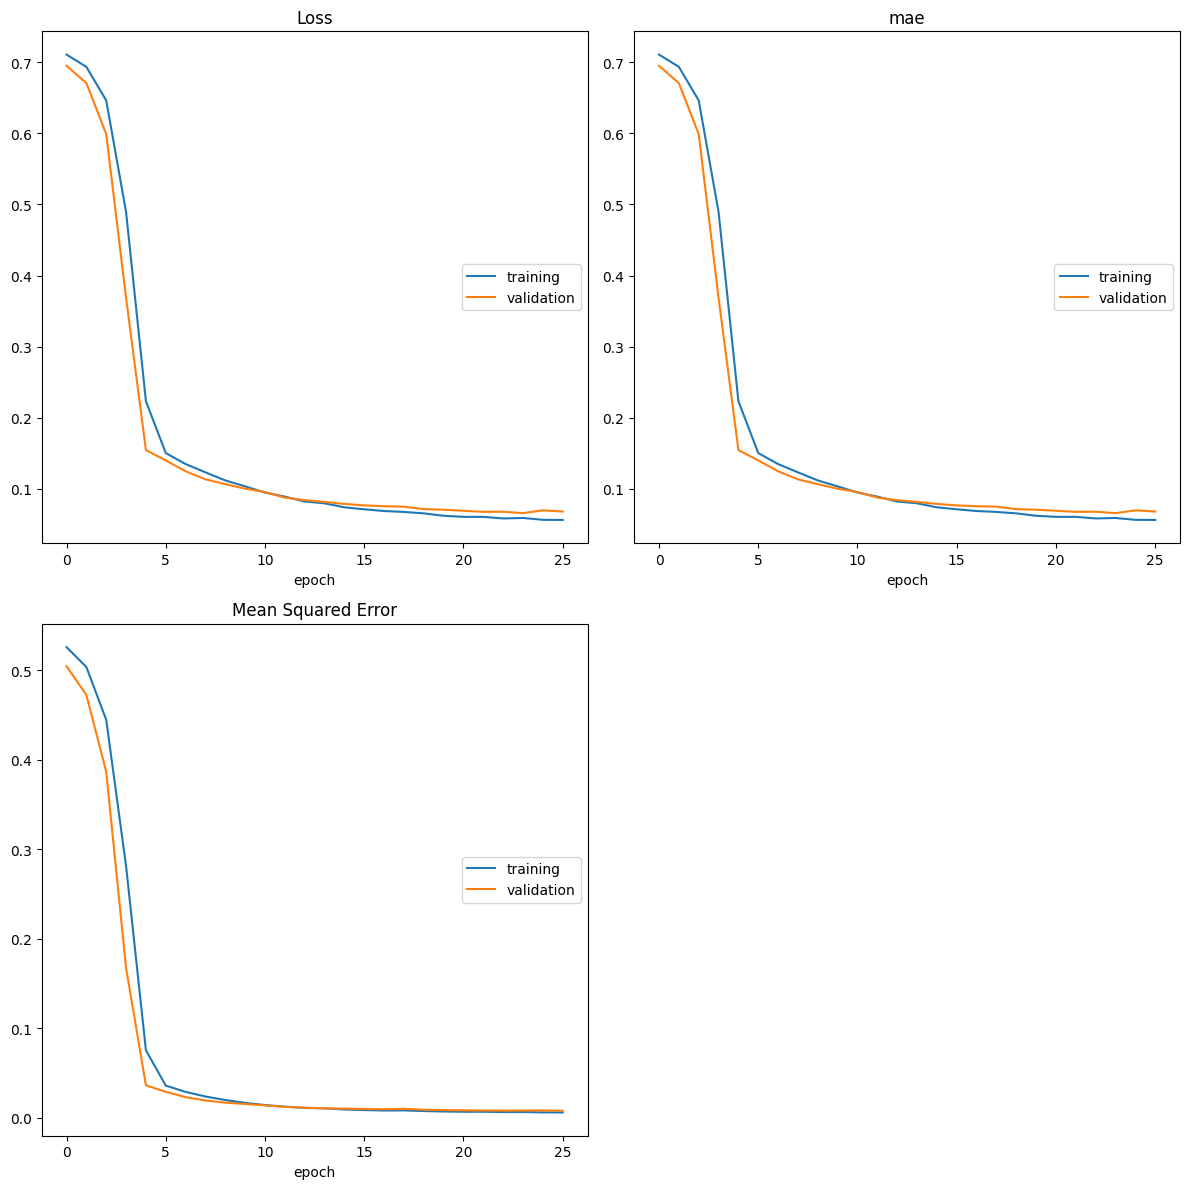

Loss
	training         	 (min:    0.056, max:    0.711, cur:    0.056)
	validation       	 (min:    0.066, max:    0.695, cur:    0.068)
mae
	training         	 (min:    0.056, max:    0.711, cur:    0.056)
	validation       	 (min:    0.066, max:    0.695, cur:    0.068)
Mean Squared Error
	training         	 (min:    0.006, max:    0.526, cur:    0.006)
	validation       	 (min:    0.008, max:    0.504, cur:    0.008)
11/11 [==============================] - 1s 84ms/step - loss: 0.0561 - mse: 0.0059 - mae: 0.0561 - val_loss: 0.0680 - val_mse: 0.0077 - val_mae: 0.0680
Epoch 26: early stopping


In [ ]:
#### Optimizador: SGD / Función de pérdida: MAE / 60 neuronas en capa oculta

keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(60, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(60,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60,
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_60 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_60 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_60 = len(historia_fit.history['val_mse'])

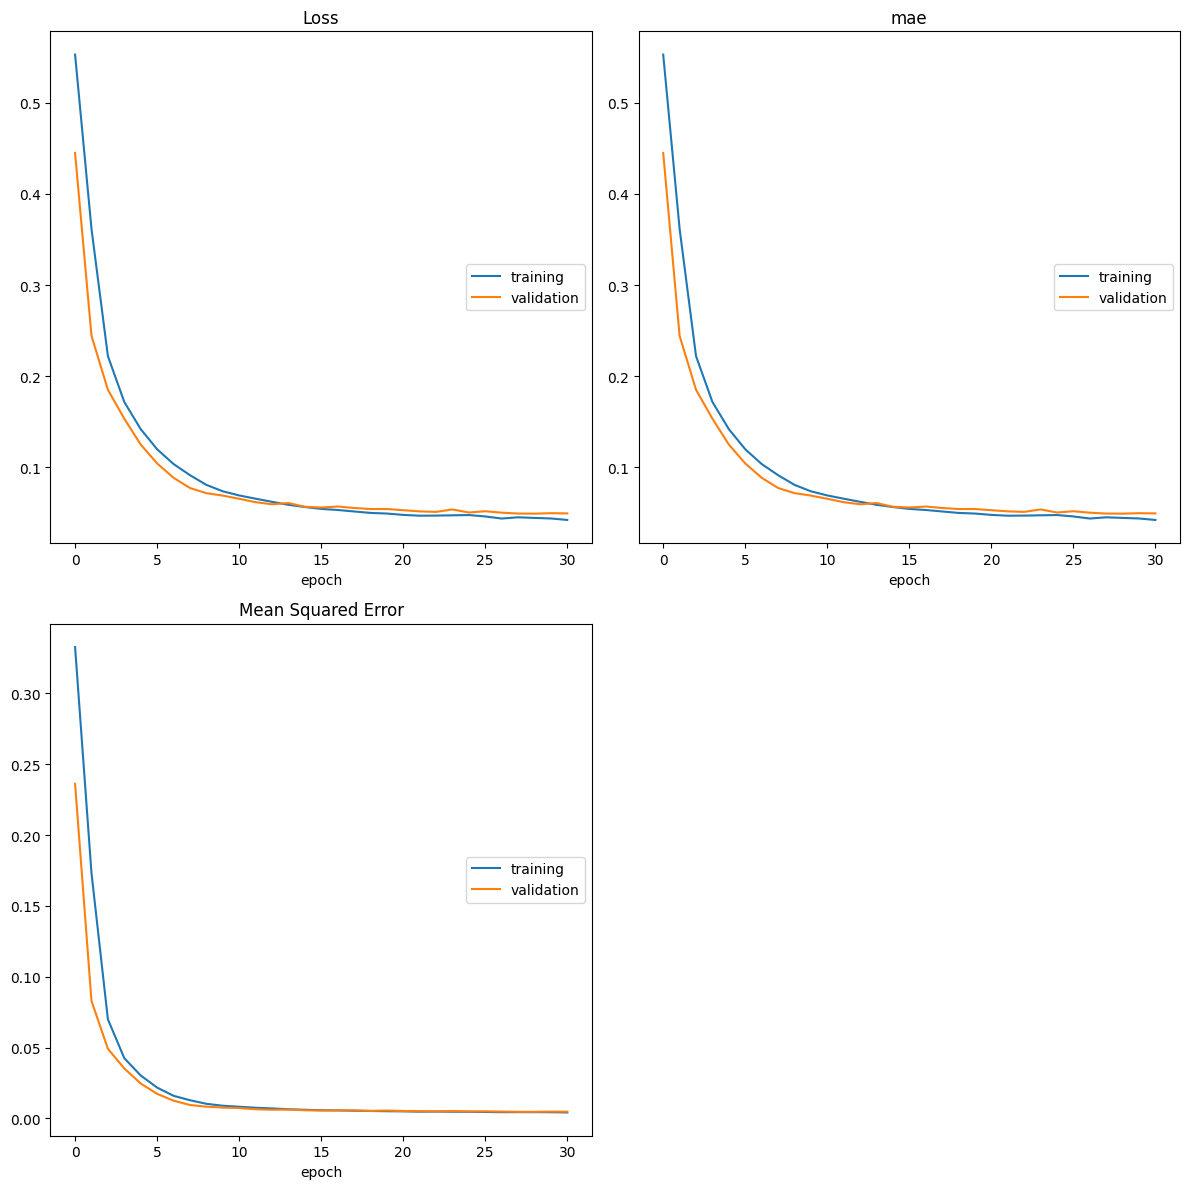

Loss
	training         	 (min:    0.042, max:    0.553, cur:    0.042)
	validation       	 (min:    0.049, max:    0.445, cur:    0.049)
mae
	training         	 (min:    0.042, max:    0.553, cur:    0.042)
	validation       	 (min:    0.049, max:    0.445, cur:    0.049)
Mean Squared Error
	training         	 (min:    0.004, max:    0.333, cur:    0.004)
	validation       	 (min:    0.005, max:    0.236, cur:    0.005)
11/11 [==============================] - 1s 139ms/step - loss: 0.0421 - mse: 0.0042 - mae: 0.0421 - val_loss: 0.0493 - val_mse: 0.0047 - val_mae: 0.0493
Epoch 31: early stopping


In [ ]:
#### Optimizador: SGD / Función de pérdida: MAE / 120 neuronas en capa oculta
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(120, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(120,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60,
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_120 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_120 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_120 = len(historia_fit.history['val_mse'])

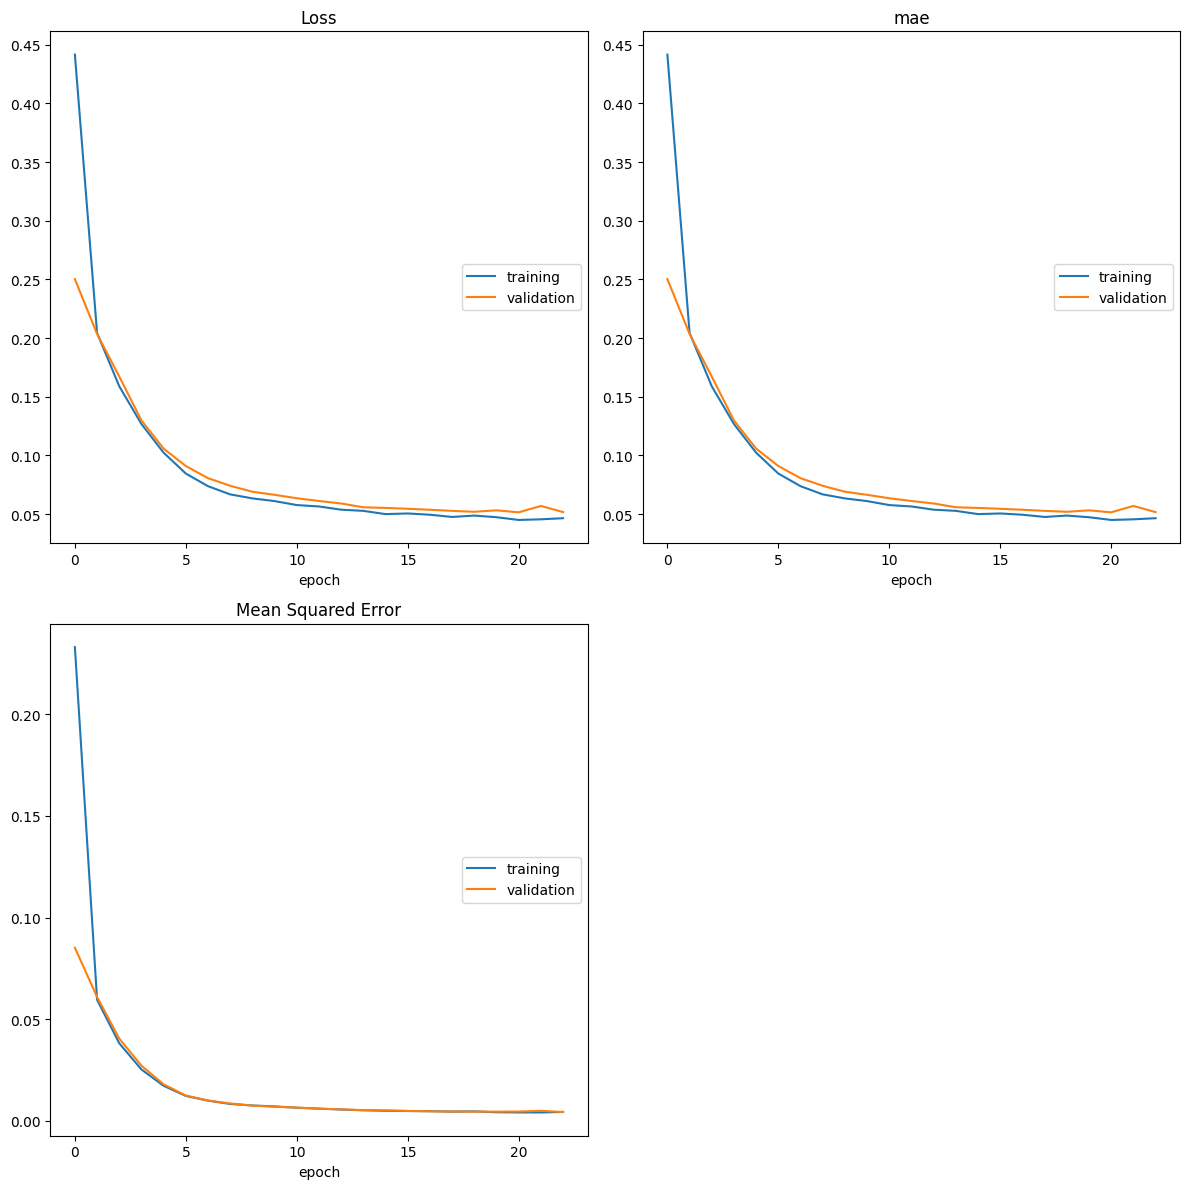

Loss
	training         	 (min:    0.045, max:    0.442, cur:    0.046)
	validation       	 (min:    0.051, max:    0.250, cur:    0.052)
mae
	training         	 (min:    0.045, max:    0.442, cur:    0.046)
	validation       	 (min:    0.051, max:    0.250, cur:    0.052)
Mean Squared Error
	training         	 (min:    0.004, max:    0.233, cur:    0.004)
	validation       	 (min:    0.004, max:    0.085, cur:    0.004)
11/11 [==============================] - 1s 87ms/step - loss: 0.0464 - mse: 0.0043 - mae: 0.0464 - val_loss: 0.0517 - val_mse: 0.0043 - val_mae: 0.0517
Epoch 23: early stopping


In [ ]:
#### Optimizador: SGD / Función de pérdida: MAE / 180 neuronas en capa oculta
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(180, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(180,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60,
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_180 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_180 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_180 = len(historia_fit.history['val_mse'])

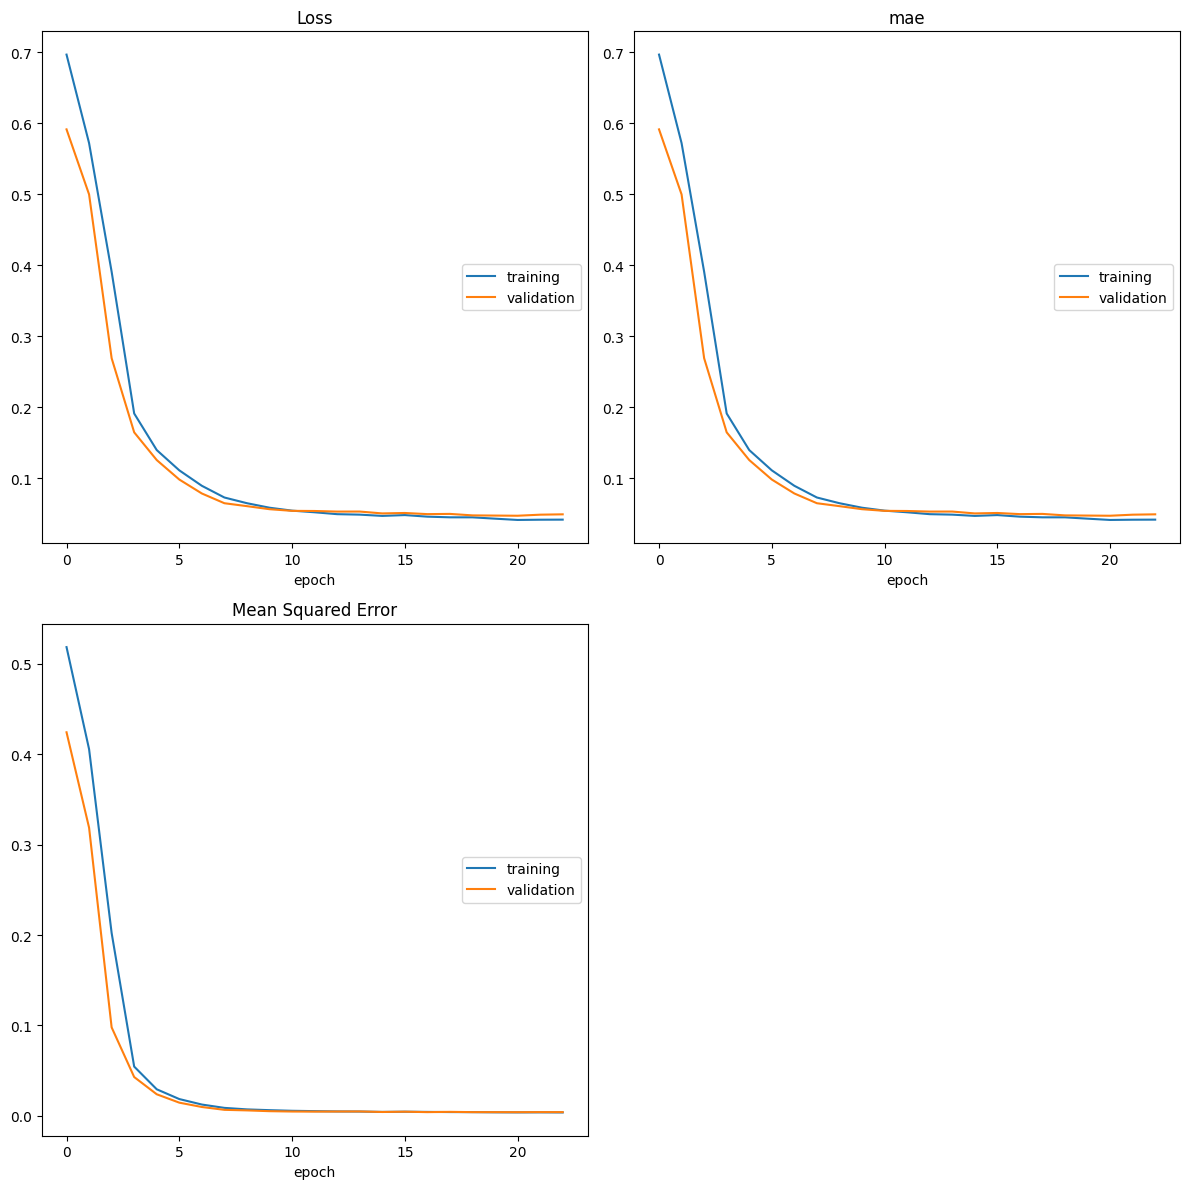

Loss
	training         	 (min:    0.042, max:    0.697, cur:    0.042)
	validation       	 (min:    0.047, max:    0.591, cur:    0.049)
mae
	training         	 (min:    0.042, max:    0.697, cur:    0.042)
	validation       	 (min:    0.047, max:    0.591, cur:    0.049)
Mean Squared Error
	training         	 (min:    0.004, max:    0.519, cur:    0.004)
	validation       	 (min:    0.004, max:    0.424, cur:    0.004)
11/11 [==============================] - 1s 132ms/step - loss: 0.0420 - mse: 0.0036 - mae: 0.0420 - val_loss: 0.0495 - val_mse: 0.0040 - val_mae: 0.0495
Epoch 23: early stopping


In [ ]:
#### Optimizador: SGD / Función de pérdida: MAE / 240 neuronas en capa oculta
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(240, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(240,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60,
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_240 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_240 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_240 = len(historia_fit.history['val_mse'])

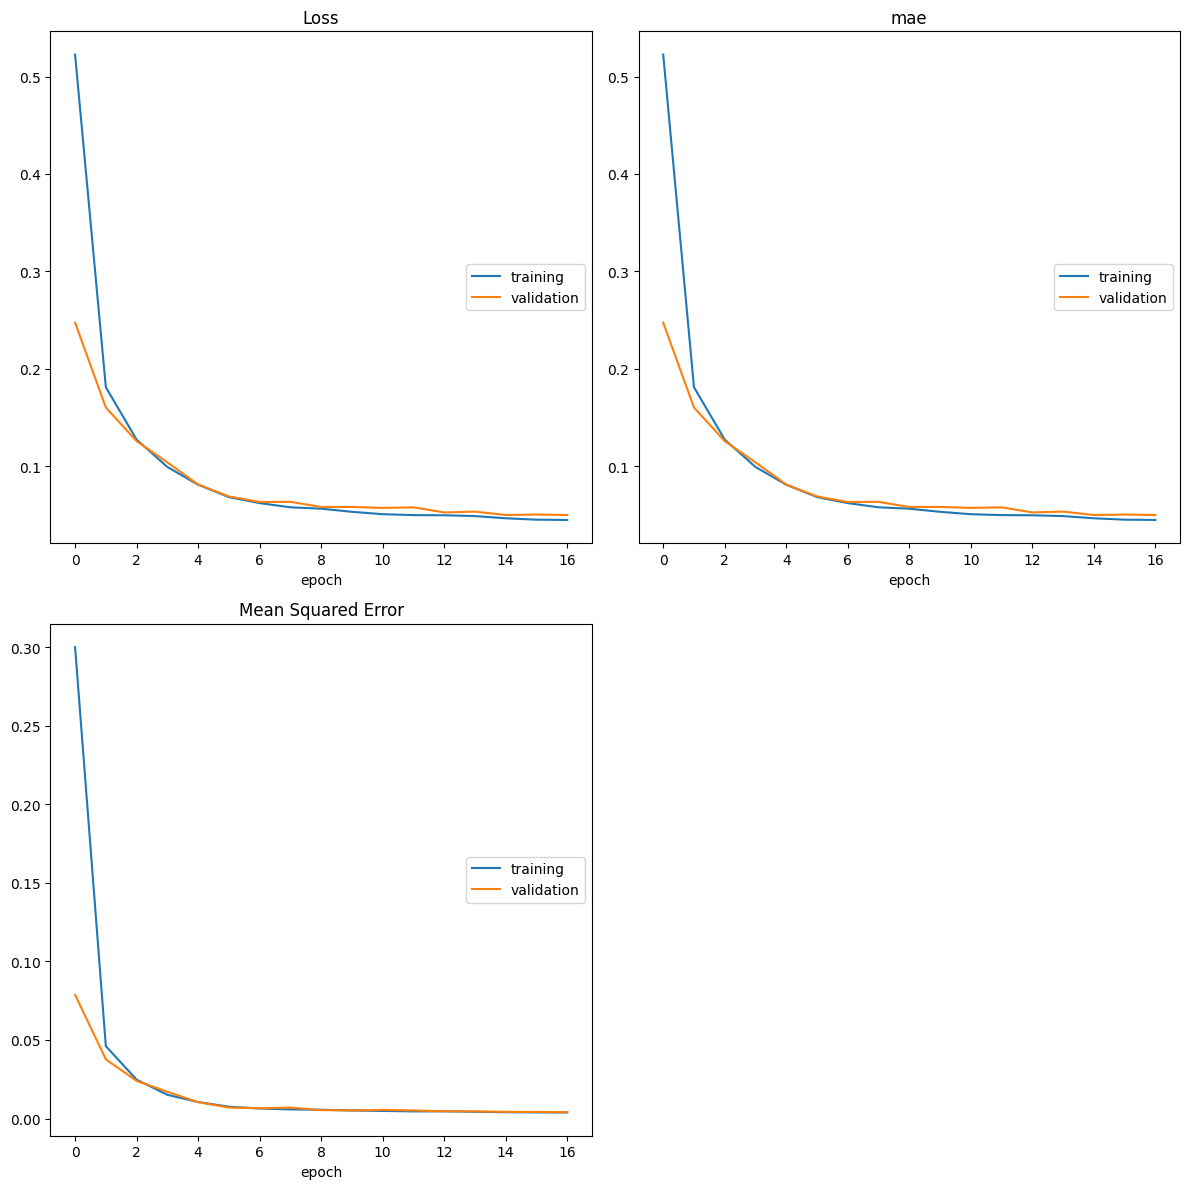

Loss
	training         	 (min:    0.045, max:    0.523, cur:    0.045)
	validation       	 (min:    0.050, max:    0.247, cur:    0.050)
mae
	training         	 (min:    0.045, max:    0.523, cur:    0.045)
	validation       	 (min:    0.050, max:    0.247, cur:    0.050)
Mean Squared Error
	training         	 (min:    0.004, max:    0.300, cur:    0.004)
	validation       	 (min:    0.004, max:    0.079, cur:    0.004)
11/11 [==============================] - 1s 91ms/step - loss: 0.0447 - mse: 0.0039 - mae: 0.0447 - val_loss: 0.0498 - val_mse: 0.0041 - val_mae: 0.0498
Epoch 17: early stopping


In [ ]:
#### Optimizador: SGD / Función de pérdida: MAE / 480 neuronas en capa oculta
keras.backend.clear_session()

# Definición red neuronal con la función Sequential()
model_2MAE = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2MAE.add(Dense(480, input_shape=(dims,),activation='relu'))
model_2MAE.add(Dense(480,activation='relu'))
model_2MAE.add(Dense(output_var))
model_2MAE.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model_2MAE.summary())

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2MAE.compile(optimizer='sgd', loss='mean_absolute_error', metrics=['mse','mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Entrenamiento de la red neuronal
historia_fit = model_2MAE.fit(xTrain_escalado, yTrain,
          validation_data = (xTest_escalado, yTest),
          epochs=60,
          callbacks=[PlotLossesKeras(), early_stop])


# Registrar MSE y MAE para comparación
MSE_sgd_mae_480 = historia_fit.history['val_mse'][-1]
MAE_sgd_mae_480 = historia_fit.history['val_mae'][-1]
Epoch_sgd_mae_480 = len(historia_fit.history['val_mse'])

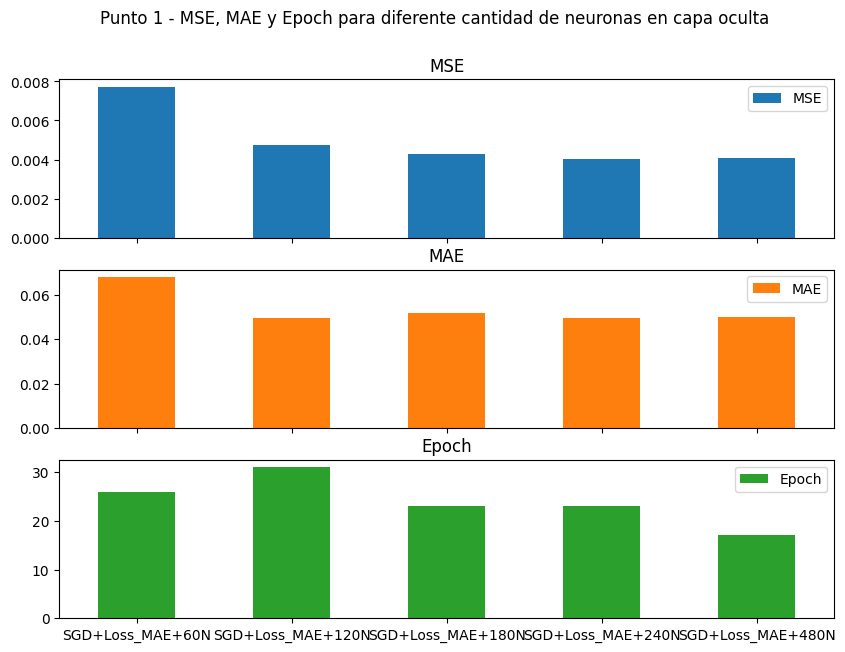

In [ ]:
### Resumen Resultados Punto 2

Punto_2 = pd.DataFrame(data={'MSE': [MSE_sgd_mae_60, MSE_sgd_mae_120, MSE_sgd_mae_180, MSE_sgd_mae_240, MSE_sgd_mae_480],
                             'MAE': [MAE_sgd_mae_60, MAE_sgd_mae_120, MAE_sgd_mae_180, MAE_sgd_mae_240, MAE_sgd_mae_480],
                             'Epoch': [Epoch_sgd_mae_60, Epoch_sgd_mae_120, Epoch_sgd_mae_180, Epoch_sgd_mae_240, Epoch_sgd_mae_480]},
                             index=['SGD+Loss_MAE+60N','SGD+Loss_MAE+120N','SGD+Loss_MAE+180N','SGD+Loss_MAE+240N','SGD+Loss_MAE+480N'])

## Graficar resultados
ax = Punto_2[['MSE','MAE', 'Epoch']].plot.bar(rot=0, subplots=True, figsize=(10,7),title="Punto 1 - MSE, MAE y Epoch para diferente cantidad de neuronas en capa oculta")

**Conclusión y Procedimiento**

Las métricas MSE y MAE disminuyen a medida que la capa intermedia tiene más neuronas, sin embargo, tienden a estabilizarse cuando el número de neuronas es muy grande. Como resultado de este punto, se selecciona al modelo obtenido con 240 neuronas en la capa oculta.

Para la construcción de esta red se realizó el siguiente procedimiento:

* Se usaron dos capas ocultas, con la cantidad de neuronas variando entre 60, 120 y 180. Se definieron las dimensiones de entrada y salida de la red neuronal, con 7 variables de entrada y 1 variable de salida.

* Para la función de pérdida se seleccionó el MAE. Como optimizador se utilizó el SGD.

* El entrenamiento de la red neuronal se realizó con 60 epoch. Se implementó Early Stopping para detener el entrenamiento si la pérdida en el conjunto de validación dejaba de disminuir después de 2 epoch consecutivos.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

En el siguiente bloque de codigo se evalua un modelo multicapa variando el numero de neuronas en 60, 120, 180, 240 y 480. Para cada modelo con el grupo de neuronas se calcula el MSE y MAE y se grafica variando el numero de neuronas. A continuacion se realiza con el optimizador 'adam'.

Entrenando modelo con 60 neuronas...
Epoch 77: early stopping
Entrenando modelo con 120 neuronas...
Epoch 56: early stopping
Entrenando modelo con 180 neuronas...
Epoch 51: early stopping
Entrenando modelo con 240 neuronas...
Epoch 27: early stopping
Entrenando modelo con 480 neuronas...
Epoch 32: early stopping


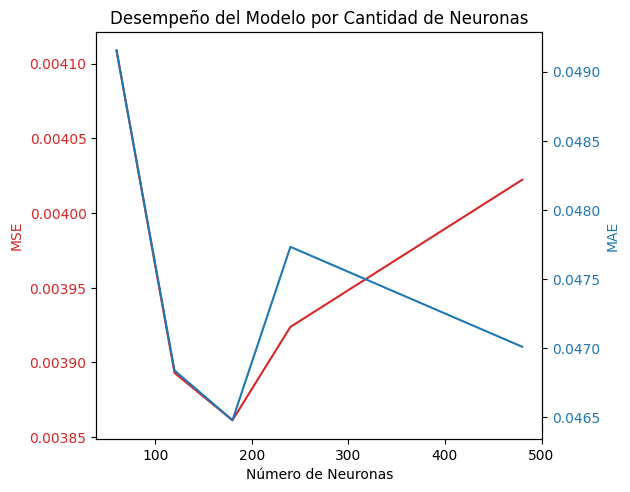

In [ ]:
# Escalar datos
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

# Número de neuronas en las capas ocultas
neuronas = [60, 120, 180, 240, 480]
resultados = []

# Función para construir el modelo
def build_model(n):
  K.clear_session()  # Limpiar la sesión de Keras
  model = Sequential([
      Dense(n, input_shape=(xTrain_scaled.shape[1],), activation='relu'),
      Dropout(0.5),
      Dense(n, activation='relu'),
      Dropout(0.3),
      Dense(1, activation='sigmoid')  # Función sigmoide para la última capa
  ])
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])
  return model

# Entrenamiento y evaluación de cada modelo
for n in neuronas:
  print(f"Entrenando modelo con {n} neuronas...")
  model = build_model(n)
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
  history = model.fit(xTrain_scaled, yTrain, epochs=100, validation_data=(xTest_scaled, yTest),
                      callbacks=[early_stopping], verbose=0)
  loss, mse, mae = model.evaluate(xTest_scaled, yTest, verbose=0)
  resultados.append((n, mse, mae))

# Desempaquetar resultados
neuron_counts, mses, maes = zip(*resultados)

# Graficar resultados
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Número de Neuronas')
ax1.set_ylabel('MSE', color=color)
ax1.plot(neuron_counts, mses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instancia un segundo eje que comparte el mismo eje X
color = 'tab:blue'
ax2.set_ylabel('MAE', color=color)
ax2.plot(neuron_counts, maes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Para asegurar que no haya superposición de layout
plt.title('Desempeño del Modelo por Cantidad de Neuronas')
plt.show()

Se realiza el mismo procedimiento pero cambiando el optimizador a 'SGD'.

Entrenando modelo con 60 neuronas...
Entrenando modelo con 120 neuronas...
Entrenando modelo con 180 neuronas...
Entrenando modelo con 240 neuronas...
Entrenando modelo con 480 neuronas...


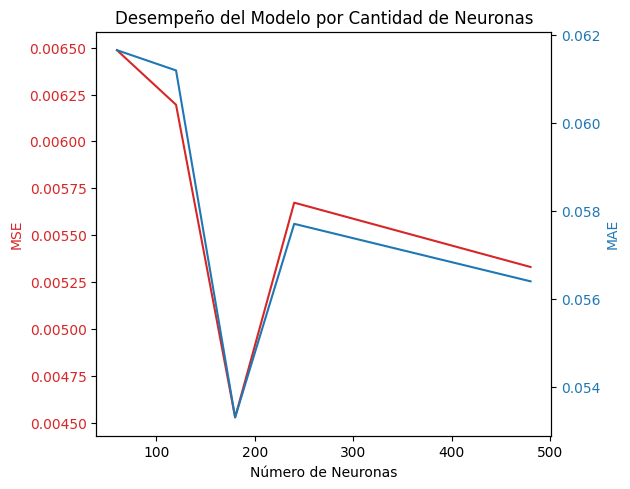

In [ ]:
# Escalar datos
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

# Número de neuronas en las capas ocultas
neuronas = [60, 120, 180, 240, 480]
resultados = []

# Función para construir el modelo
def build_model(n):
  K.clear_session()  # Limpiar la sesión de Keras
  model = Sequential([
      Dense(n, input_shape=(xTrain_scaled.shape[1],), activation='relu'),
      Dropout(0.5),
      Dense(n, activation='relu'),
      Dropout(0.3),
      Dense(1, activation='sigmoid')  # Función sigmoide para la última capa
  ])
  model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mse', 'mae'])
  return model

# Entrenamiento y evaluación de cada modelo
for n in neuronas:
  print(f"Entrenando modelo con {n} neuronas...")
  model = build_model(n)
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
  history = model.fit(xTrain_scaled, yTrain, epochs=100, validation_data=(xTest_scaled, yTest),
                      callbacks=[early_stopping], verbose=0)
  loss, mse, mae = model.evaluate(xTest_scaled, yTest, verbose=0)
  resultados.append((n, mse, mae))

# Desempaquetar resultados
neuron_counts, mses, maes = zip(*resultados)

# Graficar resultados
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Número de Neuronas')
ax1.set_ylabel('MSE', color=color)
ax1.plot(neuron_counts, mses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instancia un segundo eje que comparte el mismo eje X
color = 'tab:blue'
ax2.set_ylabel('MAE', color=color)
ax2.plot(neuron_counts, maes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Para asegurar que no haya superposición de layout
plt.title('Desempeño del Modelo por Cantidad de Neuronas')
plt.show()

Finalmente, se realiza el mismo procedimiento pero cambiando el optimizador a 'rmsprop'.

Entrenando modelo con 60 neuronas...
Epoch 44: early stopping
Entrenando modelo con 120 neuronas...
Epoch 82: early stopping
Entrenando modelo con 180 neuronas...
Epoch 39: early stopping
Entrenando modelo con 240 neuronas...
Epoch 24: early stopping
Entrenando modelo con 480 neuronas...
Epoch 24: early stopping


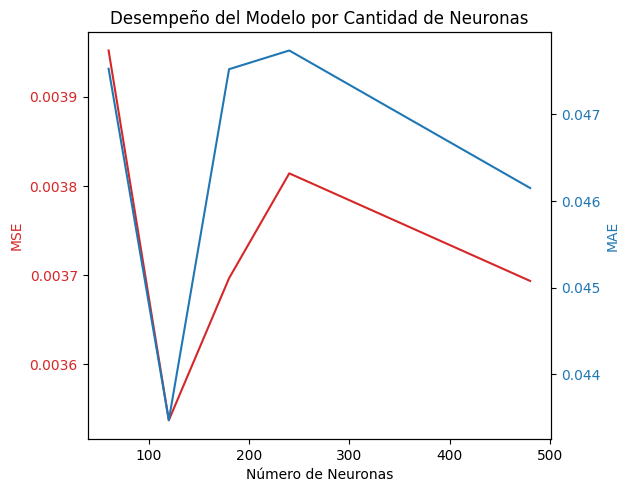

In [ ]:
# Escalar datos
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

# Número de neuronas en las capas ocultas
neuronas = [60, 120, 180, 240, 480]
resultados = []

# Función para construir el modelo
def build_model(n):
  K.clear_session()  # Limpiar la sesión de Keras
  model = Sequential([
      Dense(n, input_shape=(xTrain_scaled.shape[1],), activation='relu'),
      Dropout(0.5),
      Dense(n, activation='relu'),
      Dropout(0.3),
      Dense(1, activation='sigmoid')  # Función sigmoide para la última capa
  ])
  model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mse', 'mae'])
  return model

# Entrenamiento y evaluación de cada modelo
for n in neuronas:
  print(f"Entrenando modelo con {n} neuronas...")
  model = build_model(n)
  early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
  history = model.fit(xTrain_scaled, yTrain, epochs=100, validation_data=(xTest_scaled, yTest),
                      callbacks=[early_stopping], verbose=0)
  loss, mse, mae = model.evaluate(xTest_scaled, yTest, verbose=0)
  resultados.append((n, mse, mae))

# Desempaquetar resultados
neuron_counts, mses, maes = zip(*resultados)

# Graficar resultados
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Número de Neuronas')
ax1.set_ylabel('MSE', color=color)
ax1.plot(neuron_counts, mses, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instancia un segundo eje que comparte el mismo eje X
color = 'tab:blue'
ax2.set_ylabel('MAE', color=color)
ax2.plot(neuron_counts, maes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Para asegurar que no haya superposición de layout
plt.title('Desempeño del Modelo por Cantidad de Neuronas')
plt.show()

De las graficas anteriores se puede observar que el optimizador que obtiene el MSE y MAE mas bajos es el 'rmsprop' y lo obtiene con un numero de 120 neuronas en las capas ocultas. Por lo tanto, se entrena el modelo con 120 neuronas y se presentan los resultados:

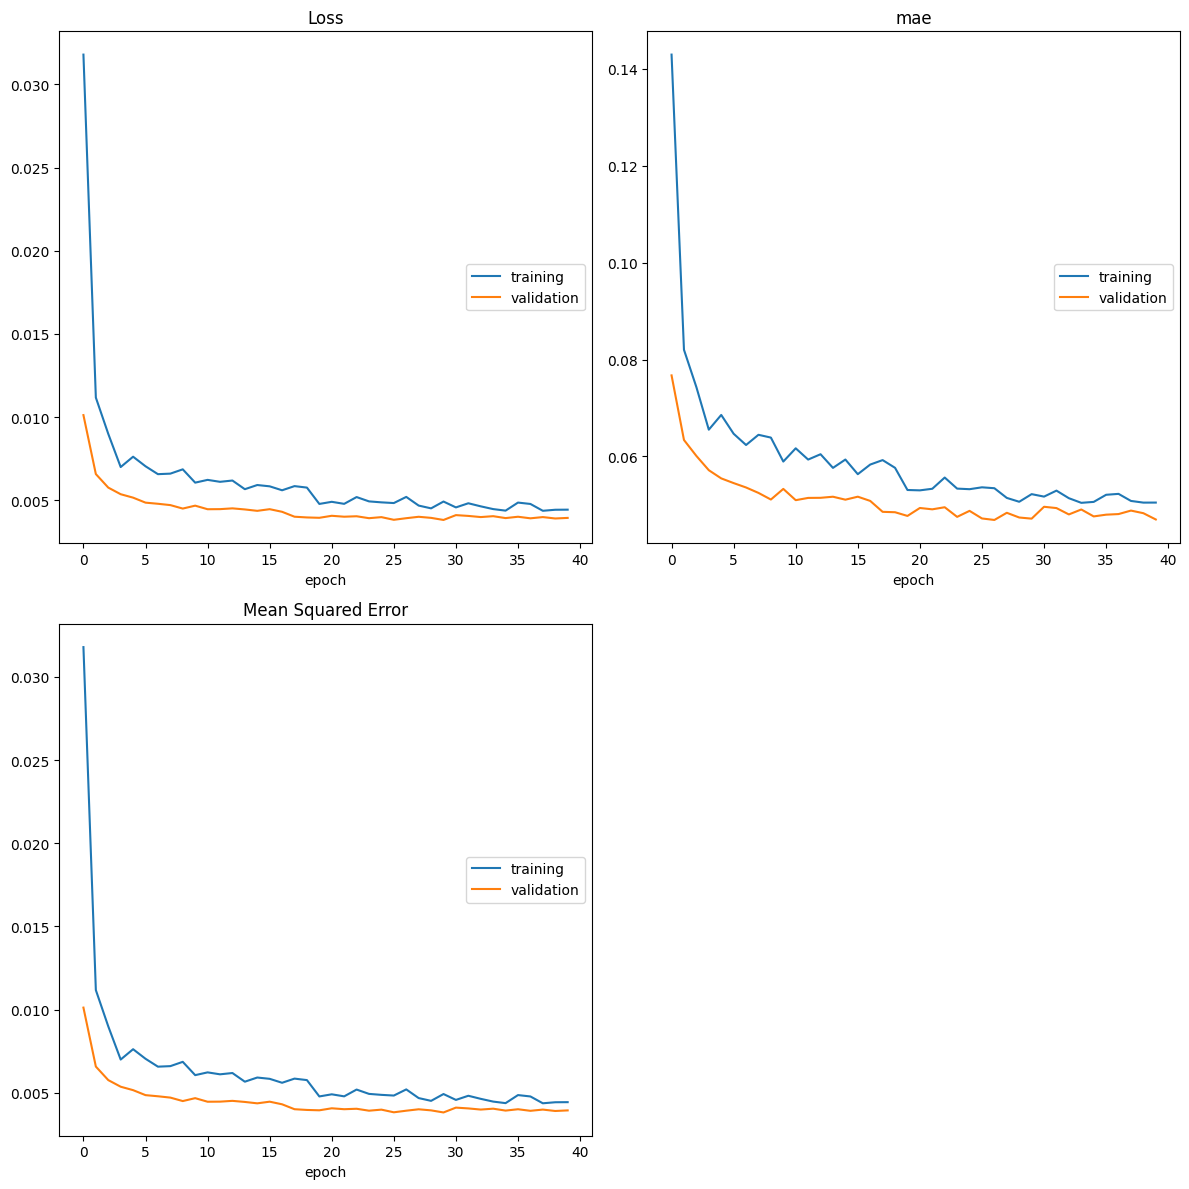

Loss
	training         	 (min:    0.004, max:    0.032, cur:    0.004)
	validation       	 (min:    0.004, max:    0.010, cur:    0.004)
mae
	training         	 (min:    0.050, max:    0.143, cur:    0.050)
	validation       	 (min:    0.047, max:    0.077, cur:    0.047)
Mean Squared Error
	training         	 (min:    0.004, max:    0.032, cur:    0.004)
	validation       	 (min:    0.004, max:    0.010, cur:    0.004)
11/11 [==============================] - 1s 133ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0505 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0470
Epoch 40: early stopping
MSE: 0.003944020718336105
MAE: 0.04700525477528572


In [ ]:
# Escalar datos
scaler = StandardScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

K.clear_session()  # Limpiar la sesión de Keras

# Definición del modelo
model_3 = Sequential([
  Dense(120, input_shape=(xTrain_scaled.shape[1],), activation='relu'),
  Dropout(0.5),
  Dense(120, activation='relu'),
  Dropout(0.3),
  Dense(120, activation='relu'),
  Dropout(0.2),
  Dense(1, activation='sigmoid')
])

# Compilación del modelo
model_3.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mse', 'mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Entrenamiento del modelo
history = model_3.fit(xTrain_scaled, yTrain, epochs=100, validation_data=(xTest_scaled, yTest),
                      callbacks=[early_stopping, PlotLossesKeras()])

# Evaluación del modelo
loss, mse, mae = model_3.evaluate(xTest_scaled, yTest, verbose=0)
print("MSE:", mse)
print("MAE:", mae)

### Conclusiones:

Basándonos en los resultados obtenidos de las diversas iteraciones del ejercicio, donde se variaron los optimizadores entre SGD, Adam y RMSprop, y se observó que el optimizador RMSprop con 120 neuronas en las capas ocultas ofreció el menor MSE y MAE, podemos llegar a las siguientes conclusiones y recomendaciones:

- **Eficiencia de RMSprop:** El optimizador RMSprop demostró ser más eficaz para este conjunto de datos. RMSprop es conocido por su capacidad de ajustar la tasa de aprendizaje de forma adaptativa, lo que puede ser particularmente ventajoso.

- **Dimensionamiento de la Capa Oculta:** El número de neuronas en las capas ocultas afecta significativamente el rendimiento del modelo. En este caso, 120 neuronas en las capas ocultas proporcionaron un balance adecuado entre capacidad de modelado y generalización. Una cantidad mayor de neuronas puede haber llevado a un sobreajuste, mientras que un número menor podría no haber capturado suficientemente la complejidad de los datos.

- **Desempeño de otros Optimizadores:** Aunque RMSprop resultó ser el mejor en este experimento, es importante notar que diferentes configuraciones de modelo o cambios en la preparación de datos podrían alterar cuál optimizador funciona mejor. Adam, que también ajusta adaptativamente las tasas de aprendizaje pero de una manera ligeramente diferente, podría ser más adecuado en otros escenarios.

El uso del optimizador RMSprop con 120 neuronas en las capas ocultas parece ser la configuración más efectiva para este modelo particular y conjunto de datos, proporcionando el equilibrio óptimo.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

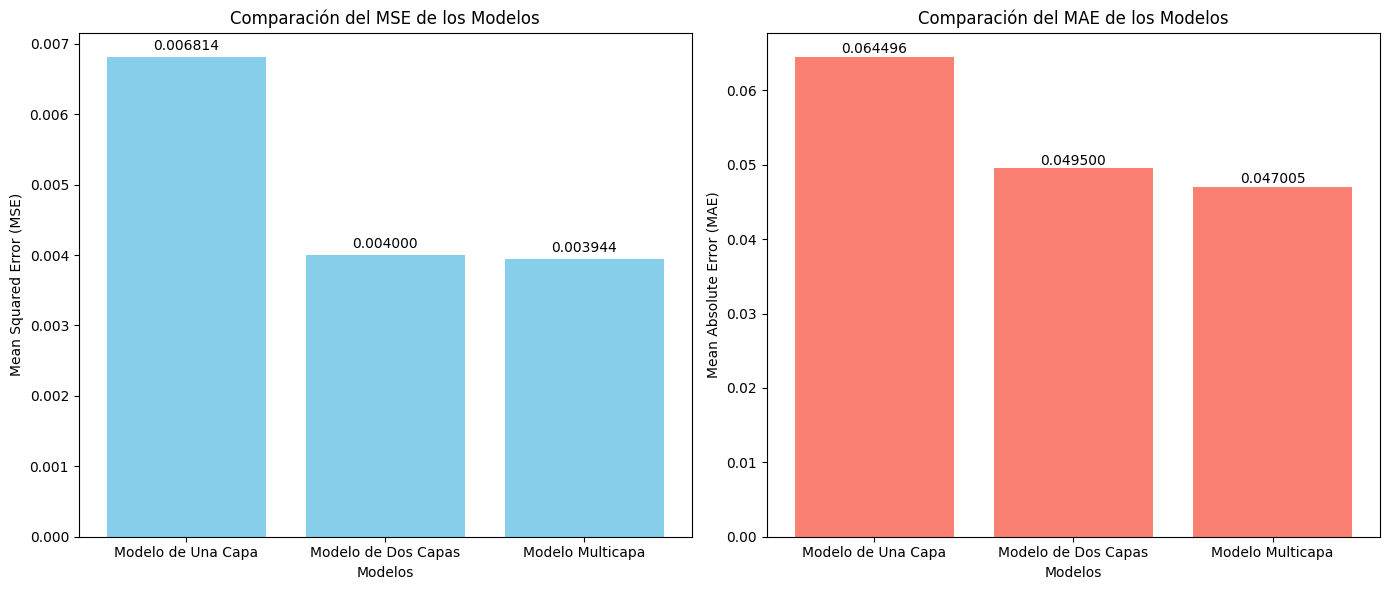

In [11]:
# Datos finales de MSE y MAE para cada modelo
mse_vals = [0.006814432622093411, 0.0040, 0.003944020718336105]
mae_vals = [0.06449559613863627, 0.0495, 0.04700525477528572]
models = ['Modelo de Una Capa', 'Modelo de Dos Capas', 'Modelo Multicapa']

# Crear gráficos
plt.figure(figsize=(14, 6))

# Gráfico para MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_vals, color='skyblue')
plt.title('Comparación del MSE de los Modelos')
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('Modelos')
for i, v in enumerate(mse_vals):
    plt.text(i, v + 0.0001, f"{v:.6f}", ha='center', color='black')

# Gráfico para MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_vals, color='salmon')
plt.title('Comparación del MAE de los Modelos')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xlabel('Modelos')
for i, v in enumerate(mae_vals):
    plt.text(i, v + 0.0005, f"{v:.6f}", ha='center', color='black')

plt.tight_layout()
plt.show()